<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_DynamicDecouping_ForNoiseCanBeSuppressedUsingSingle_qubitControlGates_mkbahk_20241029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

In [24]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [25]:
%pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.21.0.33.21
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [26]:
import qiskit
qiskit.__version__

'1.2.4'

In [27]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [28]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import XGate
from qiskit.transpiler import PassManager, InstructionDurations
from qiskit.transpiler.passes import ALAPSchedule, DynamicalDecoupling
from qiskit.visualization import timeline_drawer
from qiskit import transpile

In [29]:
# Because the legacy passes do not propagate the scheduling information correctly, it is
# necessary to run a no-op "re-schedule" before the output circuits can be drawn

def draw(circuit):
  schedule = transpile(
      circuit,
      optimization_level=0,
      instruction_durations = InstructionDurations(),
      scheduling_method="alap"
  )
  return timeline_drawer(schedule)
###def

In [30]:
circuit = QuantumCircuit(4)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.cx(2, 3)
circuit.measure_all()  #Unitary Matrix 결과를 얻기위해서는 반드시 주석처리 필요

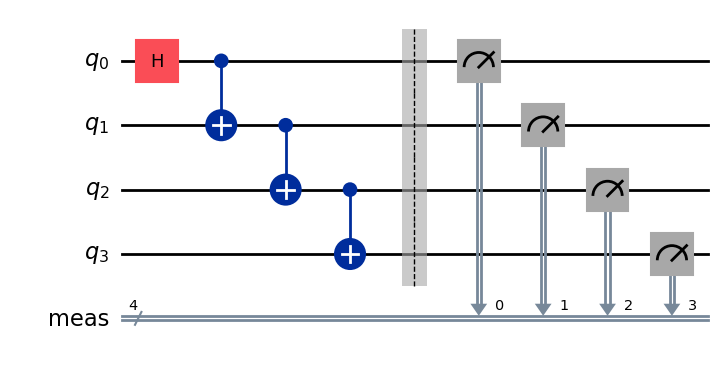

In [31]:
circuit.draw('mpl')

In [32]:
durations = InstructionDurations(
    [
        ("h", 0, 50),
        ("cx", [0, 1], 700),
        ("reset", None, 10),
        ("cx", [1, 2], 200),
        ("cx", [2, 3], 300),
        ("x", None, 50),
        ("measure", None, 1000)
    ]
)

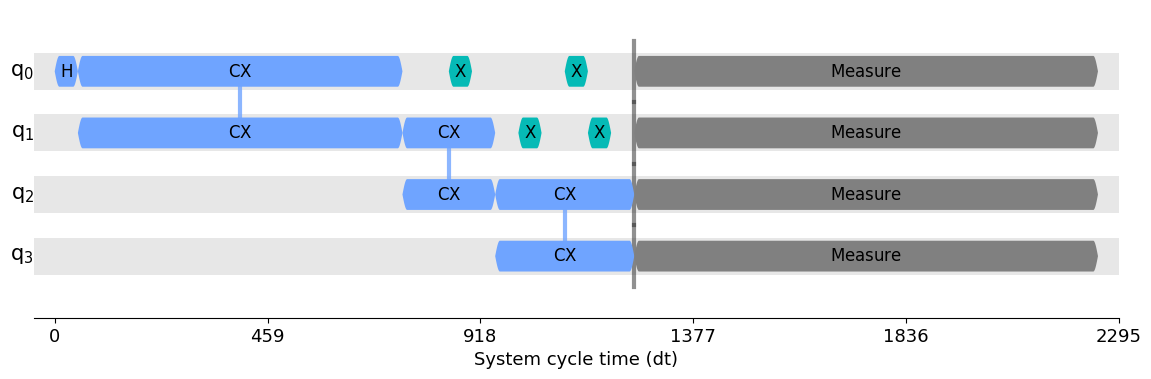

In [33]:
# balanced X-X sequence on all qubitss
dd_sequence = [XGate(), XGate()]
pm = PassManager([ALAPSchedule(durations), DynamicalDecoupling(durations, dd_sequence)])
circ_dd = pm.run(circuit)
draw(circ_dd)